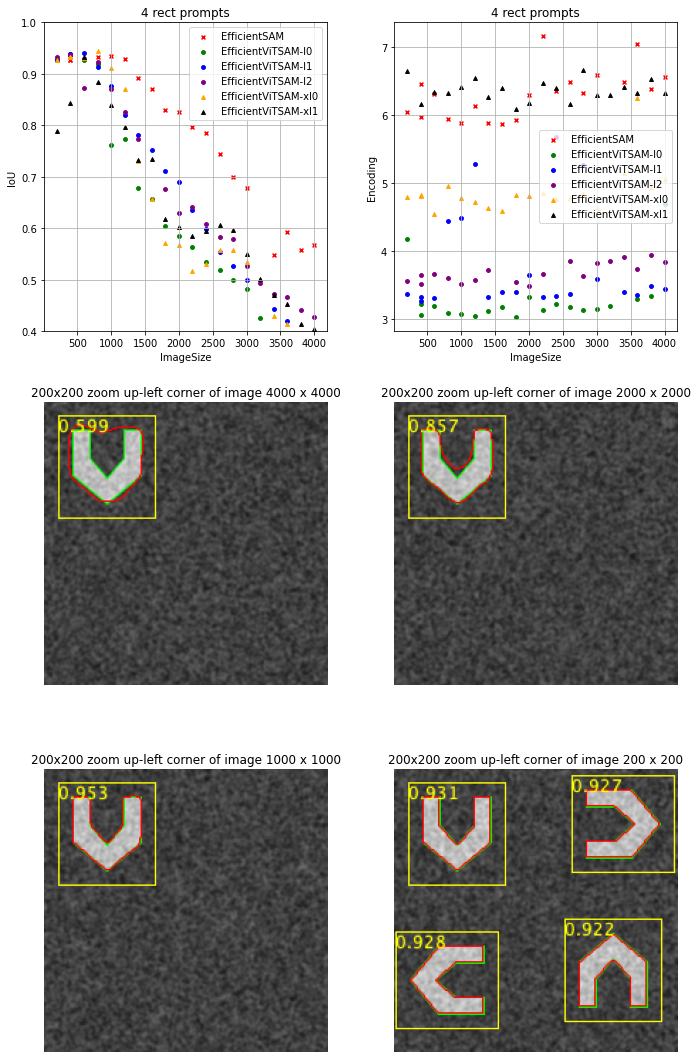

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

df = pd.read_csv('ImageSize/result-ImageSize.csv')
models = df["Model"].to_numpy()
unique_models = np.unique(models)
nrows = len(models)
nobjects = 4

def extract_average_models(header, unique_models, nobjects):
    data_float = df[header].to_numpy().astype(float)
    data_list = {model: [] for model in unique_models}
    for model, data_item in zip(models, data_float):
        data_list[model].append(data_item)
    data_model = []
    for model in np.unique(models):
        arr = np.array(data_list[model])
        mean_list = []
        for i in np.arange(0,len(arr), nobjects):
            mean_list.append(np.mean(arr[i:i+nobjects]))
        data_model.append(mean_list)
    return data_model 

imagesize = np.sqrt(extract_average_models("Image", unique_models, nobjects))
iou_model = extract_average_models("IoU", unique_models, nobjects)
encoding_model = extract_average_models("Encoding", unique_models, nobjects)

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
num_columns = len(encoding_model)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
markers = ['x', 'o', 'o', 'o', '^', '^']
s = 15
for i in range(num_columns): 
    axs[0,0].scatter(imagesize[i][1:], iou_model[i][1:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')
    axs[0,1].scatter(imagesize[i][1:], encoding_model[i][1:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')

axs[0,0].set_title(f"4 rect prompts")
axs[0,0].set_xlabel('ImageSize')
axs[0,0].set_ylabel('IoU')
axs[0,0].set_ylim([0.4, 1])
axs[0,0].grid(True)
axs[0,0].legend()

axs[0,1].set_title(f"4 rect prompts")
axs[0,1].set_xlabel('ImageSize')
axs[0,1].set_ylabel('Encoding')
axs[0,1].grid(True)
axs[0,1].legend()

isize = 16000000
a = mpimg.imread(f'ImageSize/results-EfficientSAM-128-{isize}.png')
axs[1,0].imshow(a[:200,:200])
axs[1,0].axis('off')
axs[1,0].set_title(f"200x200 zoom up-left corner of image {np.sqrt(isize):3.0f} x {np.sqrt(isize):3.0f}")

isize = 4000000
a = mpimg.imread(f'ImageSize/results-EfficientSAM-128-{isize}.png')
axs[1,1].imshow(a[:200,:200])
axs[1,1].axis('off')
axs[1,1].set_title(f"200x200 zoom up-left corner of image {np.sqrt(isize):3.0f} x {np.sqrt(isize):3.0f}")

isize = 1000000
a = mpimg.imread(f'ImageSize/results-EfficientSAM-128-{isize}.png')
axs[2,0].imshow(a[:200,:200])
axs[2,0].axis('off')
axs[2,0].set_title(f"200x200 zoom up-left corner of image {np.sqrt(isize):3.0f} x {np.sqrt(isize):3.0f}")

isize = 40000
a = mpimg.imread(f'ImageSize/results-EfficientSAM-128-{isize}.png')
axs[2,1].imshow(a[:200,:200])
axs[2,1].axis('off')
axs[2,1].set_title(f"200x200 zoom up-left corner of image {np.sqrt(isize):3.0f} x {np.sqrt(isize):3.0f}")

plt.tight_layout()
plt.savefig('Figure-ImageSize.pdf')
plt.show()
